<a href="https://colab.research.google.com/github/lorek/MethodsClassDimRed/blob/main/MoCaDR_List_nr_8_DecTree_AdaBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Trees, AdaBoost

In [1]:
# Paweł Lorek

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import time
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression



**Moons dataset**

In [4]:

x_train, y_train = make_moons(n_samples=700, noise=0.2, random_state=417)
x_test, y_test = make_moons(n_samples=300, noise=0.2, random_state=418)

x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

We will use LinearRegression for classification

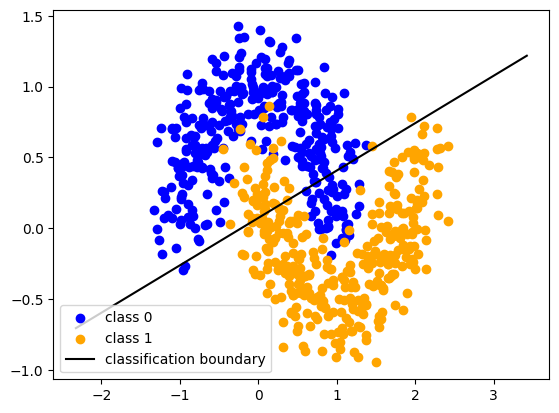

In [5]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

x_grid = np.linspace(x_min, x_max, 100)


w1, w2=regressor.coef_
intercept  = regressor.intercept_

a = -w1 / w2
b = (0.5 - intercept) / w2

plt.scatter(x_train[y_train==0][:, 0], x_train[y_train==0][:, 1], c='blue',  label='class 0')
plt.scatter(x_train[y_train==1][:, 0], x_train[y_train==1][:, 1], c='orange', label='class 1')

plt.plot(x_grid, a*x_grid+b, color="black",label='classification boundary')
plt.legend()

plt.show()



In [6]:
# prediction on test set, accuracy:

y_pred = regressor.predict(x_test)
# classify points based on the threshold
y_classified = np.where(y_pred > 0.5, 1, 0)
print("LSE-based classifier, ACC = ", accuracy_score(y_classified,y_test))

LSE-based classifier, ACC =  0.8733333333333333


## Decision trees

In [7]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import tree

In [8]:
clf_dec_tree = clf = DecisionTreeClassifier(max_depth=3) # max_depth
clf_dec_tree  = clf_dec_tree .fit(x_train,y_train)

In [9]:
y_dec_tree_pred = clf_dec_tree.predict(x_test)
print("DEC TREE classifier, ACC = ", accuracy_score(y_dec_tree_pred,y_test))

DEC TREE classifier, ACC =  0.9066666666666666


### Textual and graphical representations of trees

In [10]:
#text represantation:

text_representation = tree.export_text(clf_dec_tree)
print(text_representation)

|--- feature_1 <= 0.25
|   |--- feature_0 <= -0.40
|   |   |--- class: 0
|   |--- feature_0 >  -0.40
|   |   |--- feature_1 <= -0.01
|   |   |   |--- class: 1
|   |   |--- feature_1 >  -0.01
|   |   |   |--- class: 1
|--- feature_1 >  0.25
|   |--- feature_0 <= 1.42
|   |   |--- feature_1 <= 0.37
|   |   |   |--- class: 0
|   |   |--- feature_1 >  0.37
|   |   |   |--- class: 0
|   |--- feature_0 >  1.42
|   |   |--- class: 1



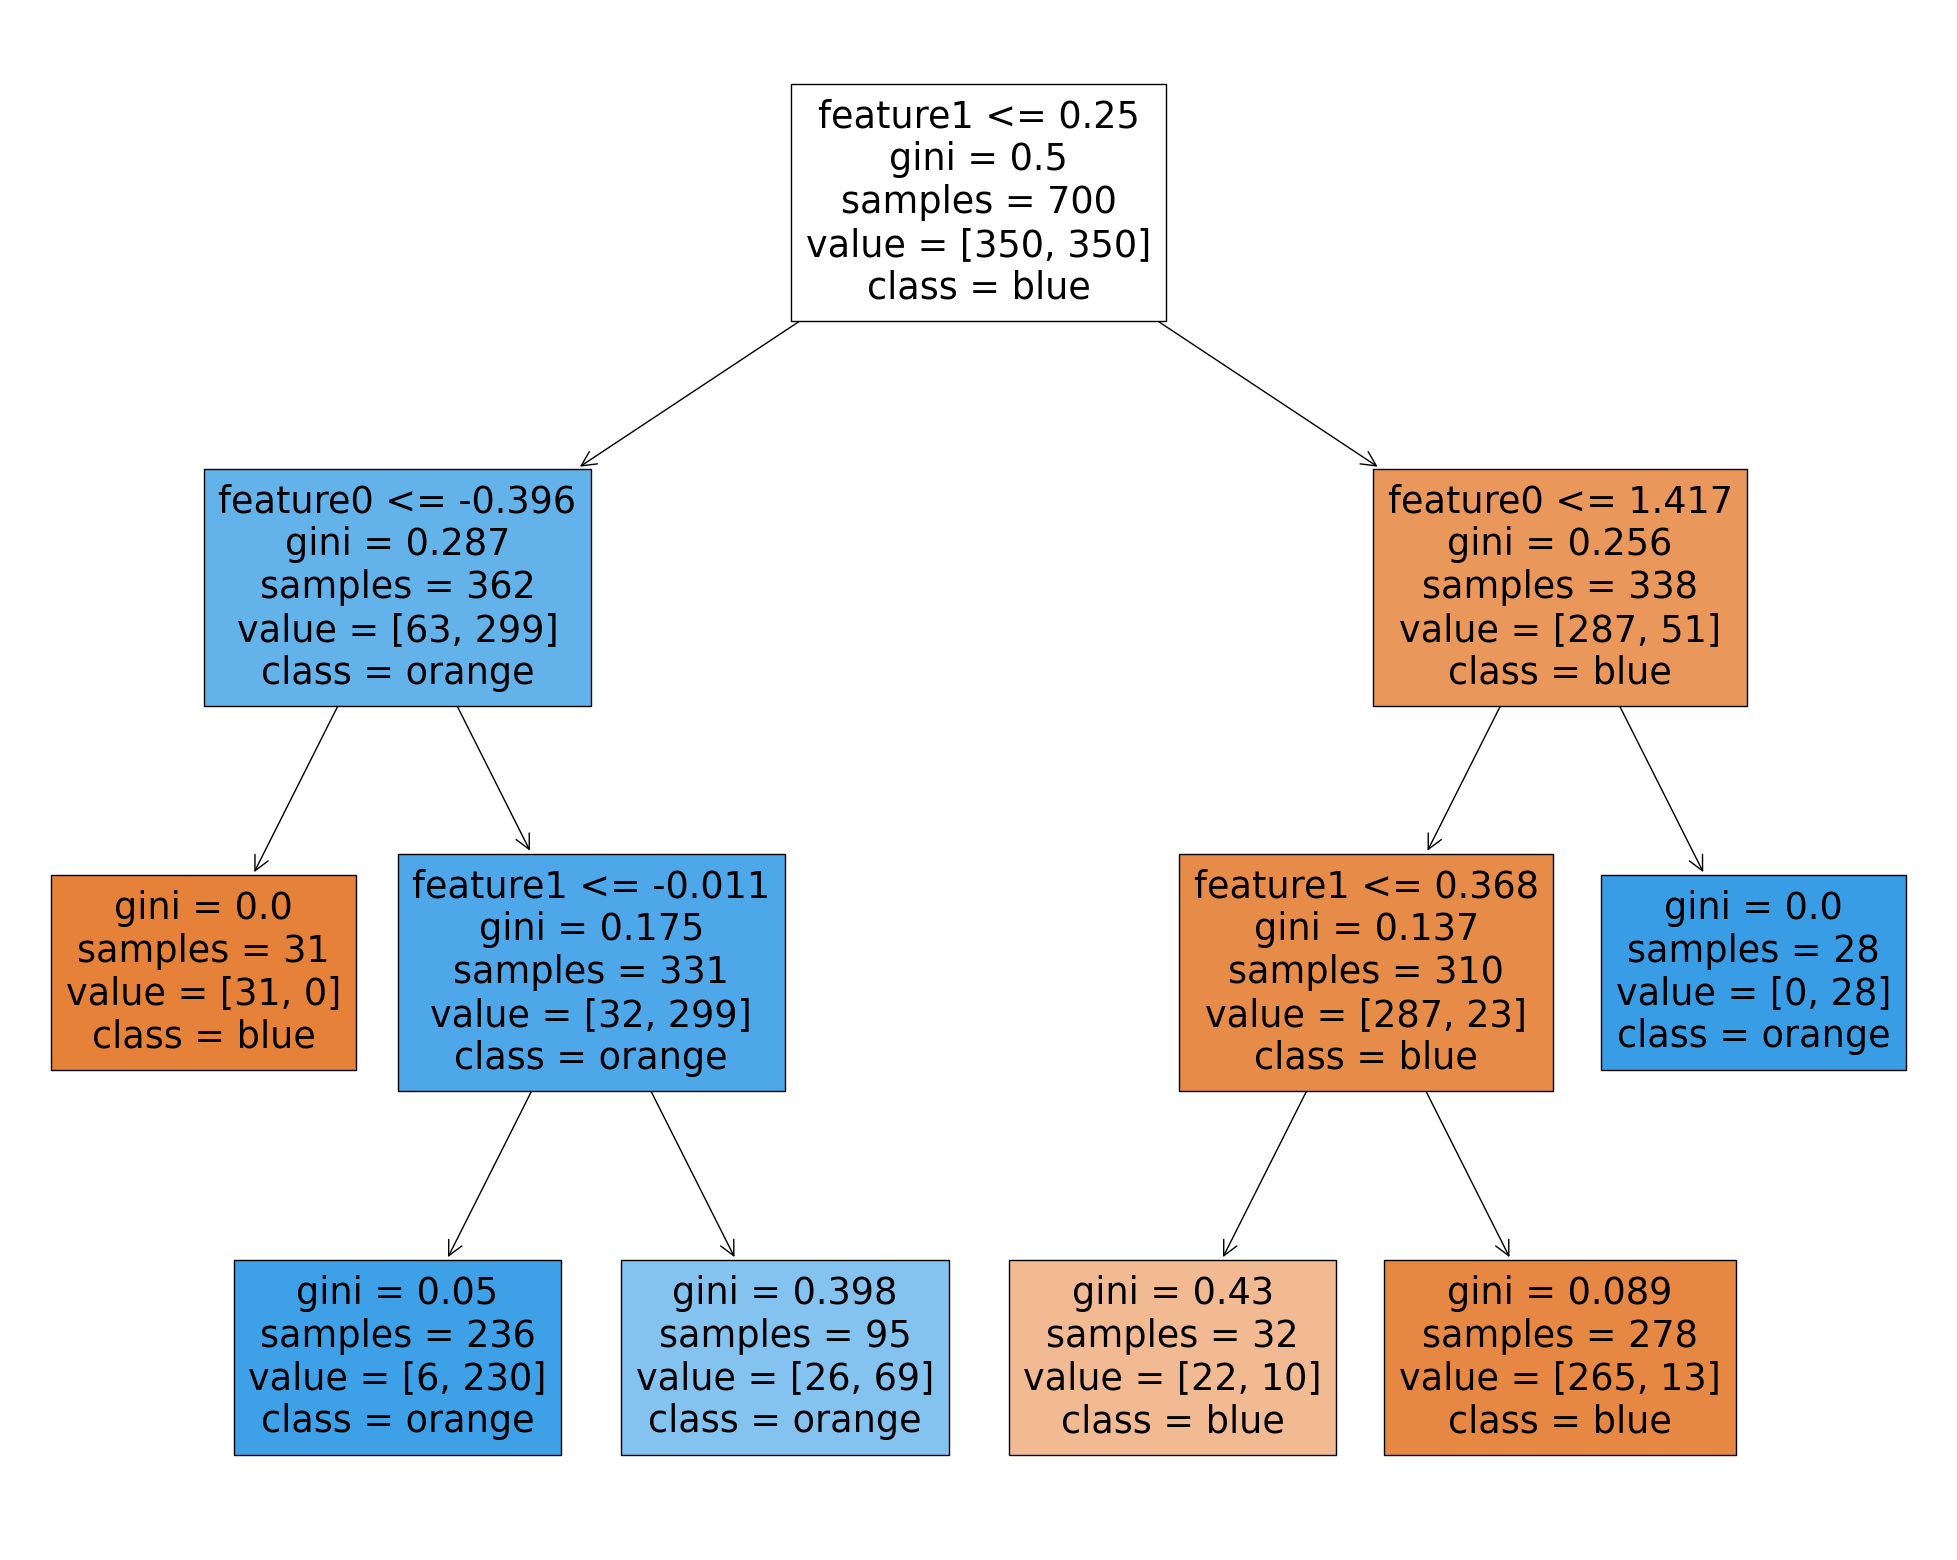

In [11]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf_dec_tree,
                   feature_names=["feature0","feature1"],
                   class_names=["blue","orange"],
                   filled=True)

### Dec tree -- Classification boundary

###A simple way to visualize decision boundaries of any classifier:

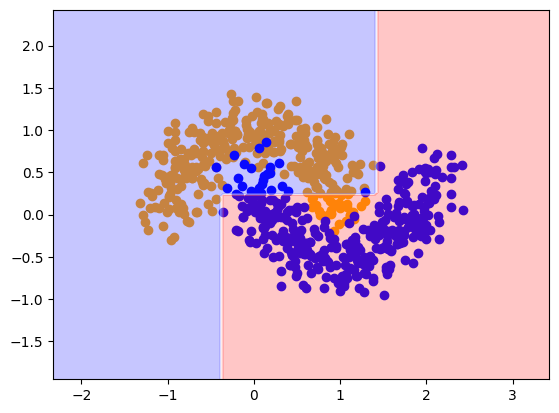

In [12]:
Z_dec = clf_dec_tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z_dec = Z_dec.reshape(xx.shape)
plt.scatter(x_train[y_train==0][:, 0], x_train[y_train==0][:, 1], c='orange',  label='class 0')
plt.scatter(x_train[y_train==1][:, 0], x_train[y_train==1][:, 1], c='blue', label='class 1')
plt.contourf(xx, yy, Z_dec,   alpha=0.26, cmap="bwr")

## AdaBoost

In [24]:
from sklearn.ensemble import AdaBoostClassifier

In [54]:
clf_Ada = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=3), n_estimators=60, random_state=322
)

In [55]:
clf_Ada.fit(x_train,y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3),
                   n_estimators=60, random_state=322)

In [56]:
y_ada_pred = clf_Ada.predict(x_test)
print("DEC TREE classifier, ACC = ", accuracy_score(y_dec_tree_pred,y_test))
print("AdaBoost classifier, ACC = ", accuracy_score(y_ada_pred,y_test))

DEC TREE classifier, ACC =  0.9066666666666666
AdaBoost classifier, ACC =  0.9666666666666667


### AdaBoost -- class. boundary

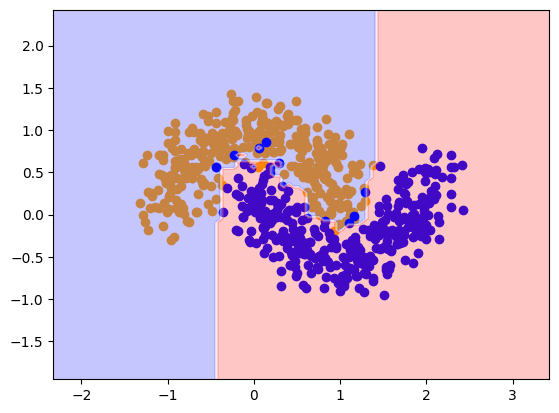

In [57]:

Z_Ada = clf_Ada.predict(np.c_[xx.ravel(), yy.ravel()])
Z_Ada = Z_Ada.reshape(xx.shape)
plt.scatter(x_train[y_train==0][:, 0], x_train[y_train==0][:, 1], c='orange',  label='class 0')
plt.scatter(x_train[y_train==1][:, 0], x_train[y_train==1][:, 1], c='blue', label='class 1')
plt.contourf(xx, yy, Z_Ada,   alpha=0.26, cmap="bwr")


# Q8.1
* In linear classifier (based on LinearRegression) a decision boundary was $y=a*x+b$, where coefficients were computed as

 `a = -w1 / w2
b = (0.5 - intercept) / w2`. Explain this.

* Experiment in above example with "deeper" decision trees, and with different number of them in AdaBoost. What is the best final accuracy (on test set) you could achieve?

* Use Decision Trees and AdaBoost for classification of IRIS dataset (see e.g., `MoCaDR_List_nr_2.ipynb`): a) on all features (classification + compute accuracy, no visualisaion); b) perfrom PCA 2d and then apply methods for these 2d data -- here perform visualisations (the same as above examples)
